In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.replace({False: 0, True: 1}, inplace=True)
df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
print((df.iloc[0]['Answer']))

My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import string 


df.replace({False: 0, True: 1}, inplace=True)

list_pos = []
list_neg = []
list_neu = []
list_compound = []

for row in range (0, df.shape[0]):
    
    example_sent = df.iloc[row]['Answer']
    example_sent = example_sent.replace(r'.', '')
    example_sent = example_sent.replace(r',', '')
    example_sent = example_sent.replace(r'!', '')
    example_sent = example_sent.replace(r';', '')
    example_sent = example_sent.replace(r'?', '')
    example_sent = example_sent.replace(r'(', '')
    example_sent = example_sent.replace(r')', '')
    example_sent = example_sent.replace(r"'", '')
    
    #example_sent = example_sent[0].replace(r'[^\w\s]+,', '')
    stop_words = set(stopwords.words('english'))
    list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im'}
    stop_words.update(list_contractions_common)
    word_tokens = word_tokenize(example_sent)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []
    

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    filtered_sentence = ' '.join(filtered_sentence)
       
            
    df.at[row,'Answer'] = filtered_sentence
    
    list_pos.append((sia.polarity_scores(filtered_sentence))['pos'])
    list_neg.append((sia.polarity_scores(filtered_sentence))['neg'])
    list_neu.append((sia.polarity_scores(filtered_sentence))['neu'])
    list_compound.append((sia.polarity_scores(filtered_sentence))['compound'])
    
df['positive_score'] = list_pos
df['negative_score'] = list_neg
df['neutral_score'] = list_neu
df['compound_score'] = list_compound

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
df.head(10)

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw,positive_score,negative_score,neutral_score,compound_score
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.320,0.033,0.647,0.9274
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.247,0.000,0.753,0.5574
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.445,0.060,0.495,0.9300
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.252,0.000,0.748,0.5719
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.278,0.177,0.545,0.4974
5,Yesterday I go work It first day back work wee...,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0.219,0.301,0.479,-0.3400
6,Yesterday I got lot things ready listing field...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.184,0.000,0.816,0.7269
7,Yesterday I finished two requirements semester...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.213,0.000,0.787,0.6908
8,yesterday work like good old days There much I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.311,0.170,0.519,0.5994
9,Yesterday sixth month I read sixth chapter Pro...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.373,0.000,0.627,0.9100


In [7]:
print((df.iloc[8]['Answer']))

yesterday work like good old days There much I barely time think I like busy overwhlemed work terribly boring slow lately Yesterday good day


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
(sia.polarity_scores((df.iloc[8]['Answer'])))

{'neg': 0.17, 'neu': 0.519, 'pos': 0.311, 'compound': 0.5994}

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Answer                    1473 non-null   object 
 1   Answer.f1.afraid.raw      1473 non-null   int64  
 2   Answer.f1.angry.raw       1473 non-null   int64  
 3   Answer.f1.anxious.raw     1473 non-null   int64  
 4   Answer.f1.ashamed.raw     1473 non-null   int64  
 5   Answer.f1.awkward.raw     1473 non-null   int64  
 6   Answer.f1.bored.raw       1473 non-null   int64  
 7   Answer.f1.calm.raw        1473 non-null   int64  
 8   Answer.f1.confused.raw    1473 non-null   int64  
 9   Answer.f1.disgusted.raw   1473 non-null   int64  
 10  Answer.f1.excited.raw     1473 non-null   int64  
 11  Answer.f1.frustrated.raw  1473 non-null   int64  
 12  Answer.f1.happy.raw       1473 non-null   int64  
 13  Answer.f1.jealous.raw     1473 non-null   int64  
 14  Answer.f

In [10]:
df.rename(columns={"Answer.f1.afraid.raw": "afraid", 
                   "Answer.f1.angry.raw": "angry", 
                   "Answer.f1.anxious.raw": "anxious", 
                   "Answer.f1.ashamed.raw": "ashamed", 
                   "Answer.f1.awkward.raw": "awkward", 
                   "Answer.f1.bored.raw": "bored", 
                   "Answer.f1.calm.raw": "calm", 
                   "Answer.f1.confused.raw": "confused", 
                   "Answer.f1.disgusted.raw": "disgusted", 
                   "Answer.f1.excited.raw": "excited", 
                   "Answer.f1.frustrated.raw": "frustrated", 
                   "Answer.f1.happy.raw": "happy", 
                   "Answer.f1.jealous.raw": "jealous", 
                   "Answer.f1.nostalgic.raw": "nostalgic", 
                   "Answer.f1.proud.raw": "proud", 
                   "Answer.f1.sad.raw": "sad", 
                   "Answer.f1.satisfied.raw": "satisfied", 
                   "Answer.f1.surprised.raw": "surprised", 
                   "Answer.t1.exercise.raw": "exercise", 
                   "Answer.t1.family.raw": "family", 
                   "Answer.t1.food.raw": "food", 
                   "Answer.t1.friends.raw": "friends", 
                   "Answer.t1.god.raw": "god", 
                   "Answer.t1.health.raw": "health", 
                   "Answer.t1.love.raw": "love", 
                   "Answer.t1.recreation.raw": "recreation", 
                   "Answer.t1.school.raw": "school", 
                   "Answer.t1.sleep.raw": "sleep", 
                   "Answer.t1.work.raw": "work",                    
                  }, inplace=True)

In [11]:
df.head()

,Answer,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,health,love,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.320,0.033,0.647,0.9274
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.247,0.000,0.753,0.5574
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.445,0.060,0.495,0.9300
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.252,0.000,0.748,0.5719
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.278,0.177,0.545,0.4974


In [12]:
print(df.iloc[0][12])
print(len(df))

1
1473


In [13]:
colname = df.columns[18]
print(colname)

surprised


In [14]:
#18 emotions
#columns 1-18 (inclusive of both)
final_emotion_list = []
for row in range (0, len(df)):
    emotion_list = []
    for col in range (1, 19):
        if (df.iloc[row][col] == 1):
            emotion_list.append(df.columns[col])
    final_emotion_list.append(emotion_list)
    
            

In [15]:
print(len(final_emotion_list))
print((final_emotion_list))

1473
[['anxious', 'happy', 'proud'], ['calm'], ['calm', 'happy', 'satisfied'], ['calm', 'happy'], ['happy'], ['angry', 'anxious', 'bored', 'frustrated', 'sad'], ['anxious', 'proud', 'satisfied'], ['proud', 'satisfied'], ['happy', 'proud'], ['happy'], ['happy'], ['happy'], ['happy', 'nostalgic', 'proud'], ['excited', 'happy', 'satisfied'], ['excited', 'happy', 'proud'], ['proud'], ['calm', 'happy', 'satisfied'], ['angry', 'frustrated', 'sad'], ['anxious', 'satisfied'], ['happy'], ['excited', 'happy', 'proud'], ['happy'], ['frustrated'], ['bored', 'frustrated', 'satisfied'], ['confused', 'frustrated', 'surprised'], ['happy', 'satisfied'], ['happy', 'satisfied'], ['excited', 'happy', 'satisfied'], ['frustrated'], ['disgusted'], ['excited', 'happy', 'satisfied'], ['confused', 'sad'], ['happy'], ['excited', 'happy'], ['happy', 'proud', 'satisfied'], ['anxious'], ['excited', 'happy', 'proud'], ['satisfied'], ['happy', 'proud', 'satisfied'], ['angry', 'anxious', 'frustrated'], ['proud'], ['ca

In [16]:
df['Emotions Felt'] = final_emotion_list

In [17]:
df.head()

,Answer,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,love,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score,Emotions Felt
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.320,0.033,0.647,0.9274,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.247,0.000,0.753,0.5574,[calm]
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.445,0.060,0.495,0.9300,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.252,0.000,0.748,0.5719,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.278,0.177,0.545,0.4974,[happy]


In [18]:
print(len(df))

1473


In [19]:
#11 topics
#columns 18-29 (inclusive of both)
#no topic lists greater than one for one person/entry, so we can just append it to one list 
final_topic_list = []
for row in range (0, len(df)):
    #topic_list = []
    for col in range (19, 30):
        if (df.iloc[row][col] == 1):
            final_topic_list.append(df.columns[col])
#no topic lists greater than one, so 

In [20]:
print(len(final_topic_list))
print((final_topic_list))

1471
['family', 'exercise', 'family', 'family', 'health', 'work', 'work', 'school', 'work', 'god', 'love', 'family', 'family', 'exercise', 'work', 'family', 'work', 'health', 'work', 'love', 'family', 'family', 'exercise', 'work', 'recreation', 'health', 'exercise', 'recreation', 'exercise', 'health', 'family', 'health', 'food', 'work', 'family', 'health', 'work', 'work', 'exercise', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'work', 'god', 'family', 'health', 'family', 'love', 'friends', 'work', 'love', 'food', 'family', 'family', 'family', 'exercise', 'food', 'family', 'work', 'work', 'work', 'god', 'family', 'family', 'health', 'work', 'work', 'work', 'work', 'work', 'family', 'recreation', 'friends', 'family', 'work', 'family', 'sleep', 'family', 'love', 'recreation', 'family', 'recreation', 'love', 'god', 'work', 'family', 'food', 'food', 'friends', 'god', 'family', 'family', 'love', 'family', 'family', 'family', 'family', 'family', 'sleep', 'family', 

In [21]:
#There are two rows which don't have any reason selected, let's find them:

for row in range (0, len(df)):
    #topic_list = []
    count = 0
    for col in range (19, 30):
        if (df.iloc[row][col] == 1):
            count = count + 1
    if (count == 0):
        print(row)

961
980


In [22]:
#now let's add the labels into the dataframe
#first one is for work which is col 29
df.iat[961,29] = 1
print(df.iloc[961][29])

1


In [23]:
#now let's add the labels into the dataframe
#second one is for god which is col 23
print(df.iloc[980][23])
df.iat[980,23] = 1
print(df.iloc[980][23])

0
1


In [24]:
#Now, let's rerun the code to get all the topics and the length should be correct
#11 topics
#columns 18-29 (inclusive of both)
#no topic lists greater than one for one person/entry, so we can just append it to one list 
final_topic_list = []
for row in range (0, len(df)):
    #topic_list = []
    for col in range (19, 30):
        if (df.iloc[row][col] == 1):
            final_topic_list.append(df.columns[col])
#no topic lists greater than one, so 

In [25]:
print(len(final_topic_list))

1473


In [26]:
df['Emotion Topic'] = final_topic_list
df.head()

,Answer,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score,Emotions Felt,Emotion Topic
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.320,0.033,0.647,0.9274,"[anxious, happy, proud]",family
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.247,0.000,0.753,0.5574,[calm],exercise
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.445,0.060,0.495,0.9300,"[calm, happy, satisfied]",family
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.252,0.000,0.748,0.5719,"[calm, happy]",family
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.278,0.177,0.545,0.4974,[happy],health


In [27]:
df2 = df.copy()
df2.head()

,Answer,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score,Emotions Felt,Emotion Topic
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.320,0.033,0.647,0.9274,"[anxious, happy, proud]",family
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.247,0.000,0.753,0.5574,[calm],exercise
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.445,0.060,0.495,0.9300,"[calm, happy, satisfied]",family
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.252,0.000,0.748,0.5719,"[calm, happy]",family
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.278,0.177,0.545,0.4974,[happy],health


In [28]:
#dropping all the cols for emotions now that we have a comprehensive one at the end
df2 = df2.drop(df2.iloc[:, 1:19],axis = 1)
df2.head()

,Answer,exercise,family,food,friends,god,health,love,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score,Emotions Felt,Emotion Topic
0,My family salient part day since days care 2 c...,0,1,0,0,0,0,0,0,0,0,0,0.320,0.033,0.647,0.9274,"[anxious, happy, proud]",family
1,Yoga keeps focused I able take time breath wor...,1,0,0,0,0,0,0,0,0,0,0,0.247,0.000,0.753,0.5574,[calm],exercise
2,Yesterday family I played bunch board games My...,0,1,0,0,0,0,0,0,0,0,0,0.445,0.060,0.495,0.9300,"[calm, happy, satisfied]",family
3,Yesterday I visited parents dinner I seen week...,0,1,0,0,0,0,0,0,0,0,0,0.252,0.000,0.748,0.5719,"[calm, happy]",family
4,Yesterday I really felt importance health I we...,0,0,0,0,0,1,0,0,0,0,0,0.278,0.177,0.545,0.4974,[happy],health


In [29]:
#dropping all the cols for emotion topics now that we have a comprehensive one at the end
df2 = df2.drop(df2.iloc[:, 1:12],axis = 1)
df2.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotions Felt,Emotion Topic
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,"[anxious, happy, proud]",family
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,[calm],exercise
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,"[calm, happy, satisfied]",family
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,"[calm, happy]",family
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,[happy],health


In [30]:
#swapping emotion topic and emotions felt columns
emotions_felt_list = df2['Emotions Felt']
#print(emotions_felt_list)
df2.drop(columns = ['Emotions Felt'], inplace = True)
#df2.head()
df2['Emotions Felt'] = emotions_felt_list
df2.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,[calm]
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,[happy]


In [31]:
print(df2.iloc[0][-1])

['anxious', 'happy', 'proud']


In [32]:
df_copied = df2.copy()
df_copied.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,[calm]
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,[happy]


In [33]:
df_copied2 = df2.copy()
df_copied2.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,[calm]
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,[happy]


In [34]:
positive_emotions = ['satisfied', 'calm', 'happy', 'nostalgic', 'excited', 'proud', 'surprised']
negative_emotions = ['afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad', 'angry', 'frustrated', 'disgusted', 'bored', 'jealous']

In [35]:
print(set(['happy']).issubset(set(['happy', 'sad', 'anxious', 'excited'])))

True


In [36]:
#864 entries in last column which have more than one entry in the emotions list
import random
positive_emotions = {'satisfied', 'calm', 'happy', 'nostalgic', 'excited', 'proud', 'surprised'}
negative_emotions = {'afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad', 'angry', 'frustrated', 'disgusted', 'bored', 'jealous'}
p1 = {'satisfied', 'calm', 'happy', 'nostalgic'}
p2 = {'excited', 'proud', 'surprised'}

n1 = {'afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad'}
n2 = {'angry', 'frustrated', 'disgusted', 'bored', 'jealous'}

for row in range (0, len(df_copied)):
    #topic_list = []
    if ((len(df_copied.iloc[row][-1])) > 1):
        pos = []
        neg = []
        for emotion in (df_copied.iloc[row][-1]):
            if (emotion in positive_emotions):
                pos.append(emotion)
            else:
                neg.append(emotion)
        if (len(pos) == len(neg)):
            c1 = 0
            c2 = 0
            c3 = 0
            c4 = 0
            for i in range (len(pos)):
                if (pos[i] in p1):
                    c1 = c1 + 1
                elif (pos[i] in p2):
                    c2 = c2 + 1
                elif (pos[i] in n1):
                    c3 = c3 + 1
                else:
                    c4 = c4 + 1
            max_val = max(c1, c2, c3, c4)
            if (max_val == c1):  
                value = 'happy'
            elif (max_val == c2):  
                value = 'excited'
            if (max_val == c3):  
                value = 'anxious'
            else:
                value  = 'angry'
            df_copied.iat[row,-1] = [value]
        elif (len(pos) > len(neg)):
            c1 = 0
            c2 = 0
            for i in range (len(pos)):
                if (pos[i] in p1):
                    c1 = c1 + 1
                else:
                    c2 = c2 + 1
            if (c1 > c2):    
                value = 'happy'
            else:
                value  = 'excited'
            df_copied.iat[row,-1] = [value]
        else:
            c1 = 0
            c2 = 0
            for i in range (len(neg)):
                if (neg[i] in n1):
                    c1 = c1 + 1
                else:
                    c2 = c2 + 1
            if (c1 > c2):    
                value = 'anxious'
            else:
                value  = 'angry'
            df_copied.iat[row,-1] = [value]
         
    if (set(df_copied.iloc[row][-1]).issubset(p1)):
        df_copied.iat[row,-1] = 'happy'
    elif (set(df_copied.iloc[row][-1]).issubset(p2)):
        df_copied.iat[row,-1] = 'excited'
    elif (set(df_copied.iloc[row][-1]).issubset(n1)):
        df_copied.iat[row,-1] = 'anxious'
    else:
        df_copied.iat[row,-1] = 'angry'
df_copied.head(10)

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,excited
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,happy
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,happy
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,happy
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,happy
5,Yesterday I go work It first day back work wee...,0.219,0.301,0.479,-0.3400,work,angry
6,Yesterday I got lot things ready listing field...,0.184,0.000,0.816,0.7269,work,excited
7,Yesterday I finished two requirements semester...,0.213,0.000,0.787,0.6908,school,excited
8,yesterday work like good old days There much I...,0.311,0.170,0.519,0.5994,work,excited
9,Yesterday sixth month I read sixth chapter Pro...,0.373,0.000,0.627,0.9100,god,happy


In [37]:
df_copied['Emotions Felt'].unique()

array(['excited', 'happy', 'angry', 'anxious'], dtype=object)

In [38]:
#864 entries in last column which have more than one entry in the emotions list
import random
for row in range (0, len(df2)):
    #topic_list = []
    index = 0
    if ((len(df2.iloc[row][-1])) > 1):
        index = random.randrange(len(df2.iloc[row][-1]))
    df2.iat[row,-1] = (df2.iloc[row][-1])[index]
df2.head(10)

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,proud
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,calm
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,satisfied
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,calm
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,happy
5,Yesterday I go work It first day back work wee...,0.219,0.301,0.479,-0.3400,work,angry
6,Yesterday I got lot things ready listing field...,0.184,0.000,0.816,0.7269,work,proud
7,Yesterday I finished two requirements semester...,0.213,0.000,0.787,0.6908,school,satisfied
8,yesterday work like good old days There much I...,0.311,0.170,0.519,0.5994,work,happy
9,Yesterday sixth month I read sixth chapter Pro...,0.373,0.000,0.627,0.9100,god,happy


In [39]:
df_copied.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,excited
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,happy
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,happy
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,happy
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,happy


In [40]:
#importing libraries and modules
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
dfCOPY2 = df_copied.copy()

In [42]:
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('happy',0)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('excited',1)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('angry',2)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('anxious',3)

In [74]:
# df_copied.head(30)
df_copied.iloc[7]["Answer"]

'Yesterday I finished two requirements semester I felt relieved requirements hindering writing MA thesis I also felt proud I able tasks flying colors'

C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=1, n=3000 (25.000%)
Class=0, n=3000 (25.000%)
Class=2, n=3000 (25.000%)
Class=3, n=3000 (25.000%)


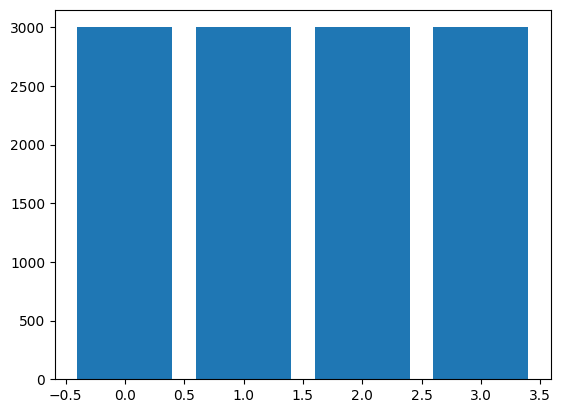

In [44]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# split into input and output elements
X, y = df_copied.iloc[:,1:5], df_copied.iloc[:,6:7]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
#oversample = SMOTE()
strategy = {0:3000, 1:3000, 2:3000, 3:3000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [45]:
counter.items()

dict_items([(1, 3000), (0, 3000), (2, 3000), (3, 3000)])

In [70]:
#ON DF_COPIED

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
joblib.dump(rfc, 'journal_model.pkl')
acc = metrics.accuracy_score(y_test, y_pred_combo)
print(acc)


0.8047222222222222


In [76]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

list_pos = []
list_neg = []
list_neu = []
list_compound = []

s1 = "Yesterday I finished two requirements semester I felt relieved requirements hindering writing MA thesis I also felt proud I able tasks flying colors"

example_sent = s1
example_sent = example_sent.replace(r'.', '')
example_sent = example_sent.replace(r',', '')
example_sent = example_sent.replace(r'!', '')
example_sent = example_sent.replace(r';', '')
example_sent = example_sent.replace(r'?', '')
example_sent = example_sent.replace(r'(', '')
example_sent = example_sent.replace(r')', '')
example_sent = example_sent.replace(r"'", '')

#print(example_sent)

#example_sent = example_sent.replace(r'[^\w\s]+,', '')
stop_words = set(stopwords.words('english'))
list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im', 'its'}
stop_words.update(list_contractions_common)



#print(word_tokens)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []


for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

filtered_sentence = ' '.join(filtered_sentence)
#print(filtered_sentence)

final_sentence = filtered_sentence
#filtered_sentence = TextBlob(filtered_sentence)
#filtered_sentence = str(filtered_sentence.correct())

print(filtered_sentence)

pos_score = (sia.polarity_scores(filtered_sentence))['pos']
neg_score = (sia.polarity_scores(filtered_sentence))['neg']
neutral_score = (sia.polarity_scores(filtered_sentence))['neu']
compound_score = (sia.polarity_scores(filtered_sentence))['compound']

    
#emotion_topic = "work"#topic entered by user, may have to implement an algorithm to pick a topic if multiple are entered
#creating a list of the necessary important
 
#lists = [pos_score, neg_score, neutral_score, compound_score]
#a = lists.reshape(1, -1)
#then you feed lists into the model to predict

data = {'positive_score': [pos_score], 'negative_score': [neg_score], 'neutral_score': [neutral_score], 'compound_score': [compound_score]}  
  
# Create DataFrame  
df_unseen = pd.DataFrame(data) 

predicted_score = rfc.predict(df_unseen)
#print(predicted_score)

#because the classification metrics were numbers, I need to convert them back to emotions
final_pred = ""
if (compound_score < 0):
    if (predicted_score == [2]):
        final_pred = 'angry'
    else:
        final_pred = 'anxious/sad'
elif (predicted_score == [0]):
    final_pred = 'happy'
elif (predicted_score == [1]):
    final_pred = 'excited'
elif (predicted_score == [2]):
    final_pred = 'angry'
else:
    final_pred = 'anxious/sad'

print(final_pred)


Yesterday I finished two requirements semester I felt relieved requirements hindering writing MA thesis I also felt proud I able tasks flying colors
excited


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#STEPS (don't run this piece of code)
#Need to take the test + classification of emotion topic
   # if there are multiple emotions topics, pick one at random?
# Extract scores out of it (emotion score)
#input it into the model with scores + topic for a final prediction

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import string 


list_pos = []
list_neg = []
list_neu = []
list_compound = []

    
example_sent = #sentence entered in the journal goes here
example_sent = example_sent.replace(r'.', '')
example_sent = example_sent.replace(r',', '')
example_sent = example_sent.replace(r'!', '')
example_sent = example_sent.replace(r';', '')
example_sent = example_sent.replace(r'?', '')
example_sent = example_sent.replace(r'(', '')
example_sent = example_sent.replace(r')', '')
example_sent = example_sent.replace(r"'", '')

#example_sent = example_sent[0].replace(r'[^\w\s]+,', '')
stop_words = set(stopwords.words('english'))
list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im'}
stop_words.update(list_contractions_common)

word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []


for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

filtered_sentence = ' '.join(filtered_sentence)


final_sentence = filtered_sentence

pos_score = (sia.polarity_scores(filtered_sentence))['pos']
neg_score = (sia.polarity_scores(filtered_sentence))['neg']
neutral_score = (sia.polarity_scores(filtered_sentence))['neu']
compound_score = (sia.polarity_scores(filtered_sentence))['compound']
    
emotion_topic = #topic entered by user, may have to implement an algorithm to pick a topic if multiple are entered
#creating a list of the necessary important
lists = [pos_score, neg_score, neutral_score, compound_score, emotion_topic]

#then you feed lists into the model to predict
predicted_score = rfc.predict(lists)

#because the classification metrics were numbers, I need to convert them back to emotions
final_pred = ""
if (predicted_score == 0):
    final_pred = 'happy'
elif (predicted_score == 1):
    final_pred = 'excited'
elif (predicted_score == 2):
    final_pred = 'angry'
else:
    final_pred = 'anxious'
    


In [48]:
#ON DF_COPIED

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_combo)
print(acc)


0.8113888888888889


In [49]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
knn_combination_f = KNeighborsClassifier(n_neighbors = 4)
knn_combination_f.fit(X_train, y_train)
y_pred_combo_f = knn_combination_f.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_combo_f))

0.7577777777777778


In [50]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
y_pred2 = nb2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.41833333333333333


In [51]:
df3 = df2.copy()
#happy = 1
#sad = 0
positive_labels = {"calm", "excited", "happy", "nostalgic", "proud", "satisfied", "surprised"}
#ok_labels = []
negative_labels = {"afriad", "angry", "anxious", "ashamed", "awkward", "bored","confused", "disgusted", "frustrated", "jealous", "sad"}
for row in range (0, len(df3)):
    #topic_list = []
    if ((df3.iloc[row][-1]) in positive_labels):
        df3.iat[row,-1] = "happy"
    else:
        df3.iat[row,-1] = "sad"
df3.head(10)

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotion Topic,Emotions Felt
0,My family salient part day since days care 2 c...,0.320,0.033,0.647,0.9274,family,happy
1,Yoga keeps focused I able take time breath wor...,0.247,0.000,0.753,0.5574,exercise,happy
2,Yesterday family I played bunch board games My...,0.445,0.060,0.495,0.9300,family,happy
3,Yesterday I visited parents dinner I seen week...,0.252,0.000,0.748,0.5719,family,happy
4,Yesterday I really felt importance health I we...,0.278,0.177,0.545,0.4974,health,happy
5,Yesterday I go work It first day back work wee...,0.219,0.301,0.479,-0.3400,work,sad
6,Yesterday I got lot things ready listing field...,0.184,0.000,0.816,0.7269,work,happy
7,Yesterday I finished two requirements semester...,0.213,0.000,0.787,0.6908,school,happy
8,yesterday work like good old days There much I...,0.311,0.170,0.519,0.5994,work,happy
9,Yesterday sixth month I read sixth chapter Pro...,0.373,0.000,0.627,0.9100,god,happy


In [52]:
#need to train one model to predict emotion topic
#need to train another to predict emotion felt

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3.iloc[:,6:7], test_size=0.3, random_state=100)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 143)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_combo)
print(acc)


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8959276018099548


In [53]:
#ON DF_COPIED

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df_copied.iloc[:,1:5], df_copied.iloc[:,6:7], test_size=0.3, random_state=100)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_combo)
print(acc)


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.5746606334841629


In [54]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3.iloc[:,6:7], test_size=0.3, random_state=100)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
y_pred2 = nb2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.9095022624434389


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
#ON DF_COPIED

from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(df_copied.iloc[:,1:5], df_copied.iloc[:,6:7], test_size=0.3, random_state=100)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
nb2 = GaussianNB()
nb2.fit(X_train, y_train)
y_pred2 = nb2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.6153846153846154


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
max = 0
max_random_state = 0
for i in range (200):
    X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3['Emotions Felt'], test_size=0.3, random_state=i)
    scaler = StandardScaler() 
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)
    nb2 = GaussianNB()
    nb2.fit(X_train, y_train)
    y_pred2 = nb2.predict(X_test)
    if (metrics.accuracy_score(y_test, y_pred2) > max):
        max = metrics.accuracy_score(y_test, y_pred2)
        max_random_state = i
print(max)
print(max_random_state)

0.9140271493212669
23


In [57]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3.iloc[:,6:7], test_size=0.3, random_state=30)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)    
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, pred))

0.9049773755656109


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
max = 0
max_random_state = 0

for i in range (200):
    X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3['Emotions Felt'], test_size=0.3, random_state=i)
    scaler = StandardScaler() 
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)    
    logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
    logreg.fit(X_train, y_train)
    pred = logreg.predict(X_test)
    
    if (metrics.accuracy_score(y_test, pred) > max):
        max = metrics.accuracy_score(y_test, pred)
        max_random_state = i

print(max)
print(max_random_state)

0.918552036199095
100


In [59]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3.iloc[:,6:7], test_size=0.3, random_state=20)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
knn_combination_f = KNeighborsClassifier(n_neighbors = 6)
knn_combination_f.fit(X_train, y_train)
y_pred_combo_f = knn_combination_f.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_combo_f))

0.8823529411764706


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
#ON DF_COPIED
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df_copied.iloc[:,1:5], df_copied.iloc[:,6:7], test_size=0.3, random_state=42)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
knn_combination_f = KNeighborsClassifier(n_neighbors = 10)
knn_combination_f.fit(X_train, y_train)
y_pred_combo_f = knn_combination_f.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_combo_f))

0.6244343891402715


C:\Users\haram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
max = 0
max_random_state = 0

for i in range (200):
    X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3['Emotions Felt'], test_size=0.3, random_state= i)
    scaler = StandardScaler() 
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)
    knn_combination_f = KNeighborsClassifier(n_neighbors = 4)
    knn_combination_f.fit(X_train, y_train)
    y_pred_combo_f = knn_combination_f.predict(X_test)
    if (metrics.accuracy_score(y_test, y_pred_combo_f) > max):
        max = metrics.accuracy_score(y_test, y_pred_combo_f)
        max_random_state = i
print(max)
print(max_random_state)
        

0.9072398190045249
49


In [62]:
print(accuracy_array)

NameError: name 'accuracy_array' is not defined

In [ ]:
# #ITERATIVE HYPERPARAMTER TUNING
# from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
# accuracy_array = [] 
# max_accuracy = 0
# random_state_max = 0
# max_estimators = 0
# for i in range (1,100):  
#     X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:5], df3['Emotions Felt'], test_size=0.3, random_state=i)
#     scaler = StandardScaler() 
#     scaler.fit(X_train) 
#     X_train = scaler.transform(X_train) 
#     X_test = scaler.transform(X_test)
#     for x in range (20, 300):
#         rfc = RandomForestClassifier(n_estimators = x)
#         rfc.fit(X_train, y_train)
#         y_pred_combo = rfc.predict(X_test)
#         acc = metrics.accuracy_score(y_test, y_pred_combo)
#         if (acc > max_accuracy):
#             random_state_max = i
#             max_estimators = x
#             max_accuracy = acc
#         accuracy_array.append(acc)


# plt.figure(figsize=(10,6))
# plt.plot(range(1,17821),accuracy_array,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
# plt.title('Model Accuracy vs n-estimators vs random-state')
# plt.xlabel('n-estimators')
# plt.ylabel('Model Accuracy')
# print("Maximum accuracy",max(accuracy_array),"at N estimators =",max_estimators, "at random_state =", random_state_max)

In [ ]:
#need to train one model to predict emotion topic
#need to train another to predict emotion felt

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,1:5], df2.iloc[:,6:7], test_size=0.3, random_state=10)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_combo)
print(acc)


In [ ]:
#you have to take in an incoming stream of text, calculate all the score metrics, and then feed it into the model


In [ ]:
# cosine distance 
# pick the most relevant emotion compared to the list of emotions

In [ ]:
data = pd.read_csv('/kaggle/input/journal-entries-with-labelled-emotions/data.csv')
data.head()

In [ ]:
data = data.iloc[:, 0:1]
data.head()

In [ ]:
data.info()

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
data['Answer'] = \
data['Answer'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
data['Answer'] = \
data['Answer'].map(lambda x: x.lower())
# Print out the first rows of papers
data['Answer'].head()

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['Answer'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data1 = data.Answer.values.tolist()
data_words = list(sent_to_words(data1))
# remove stop words
data_words = remove_stopwords(data_words)

#print(data_words[0])
print(data_words[:1][0][:30])

In [ ]:
#how often the word appears in the text

import gensim.corpora as corpora
# Create Dictionary
print(data_words[0])
id2word = corpora.Dictionary([data_words[0]])

print(id2word)

# Create Corpus


texts = data_words[0]
# Term Document Frequency
corpus = [id2word.doc2bow([text]) for text in texts]
# View
print(corpus)
#print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
#compile all the keywords together in a set for the 10 topics, and just check if each topic (from dataset) is in it, and if not ....